In [ ]:
#!pip install kmodes

In [ ]:
#!pip install PyOD

In [1]:
###########################################
# factor score decomposition
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import FancyArrowPatch

def pca_results(feature_lst, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = feature_lst)
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

def cluster_results_3d(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,12))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.3)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 5.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=12)

    ax.set_xlabel("Dimension 1", fontsize=10)
    ax.set_ylabel("Dimension 2", fontsize=10)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    
def threeplot(good_data, reduced_data, pca, angle):
    '''
    Produce a 3D plot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig = plt.figure()
    fig.set_size_inches(14, 12)
    ax = fig.add_subplot(111, projection='3d')
    # scatterplot of the reduced data    
    ax.scatter(reduced_data.loc[:, 'Dimension 1'], reduced_data.loc[:, 'Dimension 2'],reduced_data.loc[:, 'Dimension 3'],
    s=2,c='b',alpha=0.1)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 5.0,

    # projections of the original features
    colors = ['']
    for i, v in enumerate(feature_vectors):
        #ax.arrow(0, 0, 0,arrow_size*v[0], arrow_size*v[1], arrow_size*v[2],
                  #head_width=0.2, head_length=0.2, linewidth=2, color='red')
        #ax.text(v[0]*text_pos, v[1]*text_pos, v[2]*text_pos,good_data.columns[i], color='black', 
                 #ha='center', va='center', fontsize=12)
        arw = Arrow3D([0,v[0]],[0,v[1]],[0,v[2]], arrowstyle="->", color='red', lw = 3, mutation_scale=25)
        ax.add_artist(arw)    
        ax.text(v[0], v[1], v[2],good_data.columns[i],color='black', 
                 ha='center', va='center', fontsize=12)
    #arw = Arrow3D([xs1[0],xs1[2]],[ys1[0],ys1[2]],[zs1[0],zs1[2]], arrowstyle="->", color="purple", lw = 3, mutation_scale=25)
    ax.set_xlabel("Dimension 1", fontsize=10)
    ax.set_ylabel("Dimension 2", fontsize=10)
    ax.set_zlabel("Dimension 3", fontsize=10)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.view_init(30, angle)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    
    
def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("customers.csv")
	except:
	    print("Dataset could not be loaded. Is the file missing?")
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

In [2]:
import pandas as pd
import numpy as np
from dscost.pipeline import utils
from dsfunction.resources import load_map
from collections import defaultdict, Counter
import json
import matplotlib.pyplot as plt
from dsfunction.resources import load_map
import scipy.sparse as sparse
from dateutil.relativedelta import relativedelta
from datetime import datetime
from pyspark.sql.types import *
import pyspark.sql.functions as fn
from google.cloud import bigquery
from dateutil import relativedelta
from sklearn.feature_extraction import DictVectorizer
from random import sample
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, auc, f1_score, confusion_matrix
import shap

#import src.visuals as vs

In [3]:
df = pd.read_csv('gs://lumi-dev/users/rohun/multiplan')
df.shape

/usr/local/lib/python3.6/site-packages/aiohttp-4.0.0a1-py3.6-linux-x86_64.egg/aiohttp/client.py:977: RuntimeWarning: coroutine 'noop' was never awaited
  self._resp.release()
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,10,11,16,34,36,37,38,39,40,41,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(924755, 57)

In [4]:
df.columns

Index(['ClaimID', 'PriorClaimID', 'ClaimType', 'MemberDOB', 'MemberSex',
       'ProductCode', 'BillType', 'ServiceFrom', 'ServiceTo', 'AdmitDate',
       'AdmitType', 'AdmitSource', 'DischargeStatus', 'ProviderID',
       'ProviderOrg', 'ProviderLName', 'ProviderFName', 'ProviderTIN',
       'ProviderNP', 'ProviderState', 'HdrCharges', 'ASOFlag',
       'ContractedFlag', 'PrimaryFlag', 'DRGCode', 'DRGVersion',
       'PrincipalDiag1', 'AdmittingDiag', 'Diag2', 'Diag3', 'Diag4', 'Diag5',
       'Diag6', 'Diag7', 'ICDProc1Princ', 'ICDProc1Date', 'ICDProc2',
       'ICDProc2Date', 'ICDProc3', 'ICDProc3Date', 'ICDProc4', 'ICDProc4Date',
       'LineNumber', 'LineRevCode', 'LinePOS', 'LineProcCode', 'MOD1', 'MOD2',
       'MOD3', 'MOD4', 'LineStartDate', 'LineEndDate', 'LineUnits', 'LineNPI',
       'LineCharges', 'LineNonCovCharges', 'CLAIM_PAR_SCORE'],
      dtype='object')

In [5]:
# Data cleaning
code_names = {'LineRevCode':'rv', 'LineProcCode':'proc', 'AdmittingDiag':'diag', 'Diag2':'diag', 'Diag3': 'diag', 'Diag4':'diag',
             'BillType':'bt', 'AdmitType':'at', 'ProviderTIN':'tin'}

def get_age(birth_date):
    date = pd.to_datetime('2020-01-01')
    birth_date = pd.to_datetime(birth_date)
    age = (date - birth_date).days / 365.25
    return age

df['gender'] = df['MemberSex'].apply(lambda x: 1 if 'M' else 0)
df['age'] = df['MemberDOB'].apply(get_age)

df = df[df['age'] <= 90]
print(df.shape)

df = df[df['CLAIM_PAR_SCORE'].notnull()]
df.shape

(924152, 59)


(917505, 59)

In [6]:
# provider level

In [7]:
df['member_id'] = df['MemberSex'] + '_' + df['MemberDOB']

In [8]:
# Number of unique patients for the provider
provider_group = pd.DataFrame(df.groupby('ProviderTIN')['member_id'].nunique()).reset_index()
prov_num_pat = dict(zip(provider_group['ProviderTIN'].values, provider_group['member_id'].values))
len(prov_num_pat)

6382

In [9]:
all_providers = list(prov_num_pat.keys())
prov_df = pd.DataFrame()
prov_df['num_unique_pat'] = [prov_num_pat[i] for i in all_providers]

In [10]:
# Number of unique claims for the provider
provider_group = pd.DataFrame(df.groupby('ProviderTIN')['ClaimID'].nunique()).reset_index()
prov_num_claim = dict(zip(provider_group['ProviderTIN'].values, provider_group['ClaimID'].values))
prov_df['num_unique_claims'] = [prov_num_claim[i] for i in all_providers]

In [11]:
#avg number of claims per patient
prov_pat_group = pd.DataFrame(df.groupby(['ProviderTIN', 'member_id'])['ClaimID'].nunique()).reset_index()
prov_avg_claims = pd.DataFrame(prov_pat_group.groupby('ProviderTIN')['ClaimID'].mean()).reset_index()
prov_avg_claims = dict(zip(prov_avg_claims['ProviderTIN'].values, prov_avg_claims['ClaimID'].values))
prov_df['avg_claims_per_pat'] = [prov_avg_claims[i] for i in all_providers]

In [12]:
# avg number of procedure codes per claim
prov_claim_group = pd.DataFrame(df.groupby(['ProviderTIN', 'ClaimID'])['LineProcCode'].nunique()).reset_index()
prov_num_procs = pd.DataFrame(prov_claim_group.groupby('ProviderTIN')['LineProcCode'].mean()).reset_index()
prov_num_procs = dict(zip(prov_num_procs['ProviderTIN'].values, prov_num_procs['LineProcCode'].values))
prov_df['avg_proc_per_claims'] = [prov_num_procs[i] for i in all_providers]

In [13]:
# avg number of procedure codes per patient
prov_pat_group = pd.DataFrame(df.groupby(['ProviderTIN', 'member_id'])['LineProcCode'].nunique()).reset_index()
prov_num_procs = pd.DataFrame(prov_pat_group.groupby('ProviderTIN')['LineProcCode'].mean()).reset_index()
prov_num_procs = dict(zip(prov_num_procs['ProviderTIN'].values, prov_num_procs['LineProcCode'].values))
prov_df['avg_proc_per_pat'] = [prov_num_procs[i] for i in all_providers]

In [14]:
## avg cost of a claim 
prov_claim_group = pd.DataFrame(df.groupby(['ProviderTIN', 'ClaimID'])['LineCharges'].sum()).reset_index()
prov_claim_cost = pd.DataFrame(prov_claim_group.groupby('ProviderTIN')['LineCharges'].mean()).reset_index()
prov_claim_cost = dict(zip(prov_claim_cost['ProviderTIN'].values, prov_claim_cost['LineCharges'].values))
prov_df['avg_claim_cost'] = [prov_claim_cost[i] for i in all_providers]

In [15]:
# avg cost of a patient
prov_pat_group = pd.DataFrame(df.groupby(['ProviderTIN', 'member_id'])['LineCharges'].sum()).reset_index()
prov_pat_cost = pd.DataFrame(prov_pat_group.groupby('ProviderTIN')['LineCharges'].mean()).reset_index()
prov_pat_cost = dict(zip(prov_pat_cost['ProviderTIN'].values, prov_pat_cost['LineCharges'].values))
prov_df['avg_pat_cost'] = [prov_pat_cost[i] for i in all_providers]

In [16]:
train_prov_keys = set(sample(all_providers, 5000))
test_prov_keys = set([i for i in all_providers if i not in train_prov_keys])
print(len(train_prov_keys), len(test_prov_keys))

5000 1382


In [17]:
prov_df['provider'] = all_providers
train_prov_df = prov_df[prov_df['provider'].isin(train_prov_keys)]
train_prov_df.shape

(5000, 8)

In [18]:
df_grouped = pd.DataFrame(df.groupby('ClaimID')['CLAIM_PAR_SCORE'].mean()).reset_index()
target = dict(zip(df_grouped['ClaimID'].values, df_grouped['CLAIM_PAR_SCORE'].values))

In [19]:
df_grouped = pd.DataFrame(df.groupby('ProviderTIN')['CLAIM_PAR_SCORE'].mean()).reset_index()
provider_par_score = dict(zip(df_grouped['ProviderTIN'].values, df_grouped['CLAIM_PAR_SCORE'].values))

In [20]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(train_prov_df.drop('provider', axis=1))

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
train_prov_df.drop('provider', axis=1).shape

(5000, 7)

In [23]:
train_prov_df.drop('provider', axis=1).columns

Index(['num_unique_pat', 'num_unique_claims', 'avg_claims_per_pat',
       'avg_proc_per_claims', 'avg_proc_per_pat', 'avg_claim_cost',
       'avg_pat_cost'],
      dtype='object')

In [22]:
x_train.shape

(5000, 7)

In [ ]:
## K-means clustering

In [24]:
train_prov_df['par_score'] = [provider_par_score[i] for i in train_prov_df['provider']]

/usr/local/bin/ipython:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  #!/usr/bin/python3


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42, n_init=100)
km.fit(x_train)
pred = km.labels_
train_prov_df['preds'] = pred

/usr/local/bin/ipython:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
print(Counter(pred))
for col in train_prov_df.columns:
    if col != 'provider':
        print(col, train_prov_df[train_prov_df['preds'] == 0][col].mean(), train_prov_df[train_prov_df['preds'] == 1][col].mean())

Counter({0: 4755, 1: 245})
num_unique_pat 17.61808622502629 15.412244897959184
num_unique_claims 48.479915878023135 37.39591836734694
avg_claims_per_pat 2.486599208360629 1.841256721826078
avg_proc_per_claims 1.9070487260921616 11.786534444476972
avg_proc_per_pat 2.12165762808161 13.082471512503771
avg_claim_cost 12501.986814962247 41498.059713082184
avg_pat_cost 22164.728621112456 78755.71339349826
par_score -43.87236522077228 -93.1872506398922
preds 0.0 1.0


In [27]:
centroids = km.cluster_centers_
centroids

array([[ 2.45605359e-03,  3.27823680e-03,  9.34033257e-03,
        -1.67034792e-01, -1.68452563e-01, -5.68084179e-02,
        -6.65117600e-02],
       [-4.76674891e-02, -6.36245550e-02, -1.81278699e-01,
         3.24183852e+00,  3.26935484e+00,  1.10254705e+00,
         1.29087110e+00]])

In [28]:
train_prov_df[train_prov_df['preds'] == 0]['par_score'].mean(), train_prov_df[train_prov_df['preds'] == 1]['par_score'].mean()

(-43.87236522077228, -93.1872506398922)

In [29]:
train_prov_df[train_prov_df['preds'] == 1]

,num_unique_pat,num_unique_claims,avg_claims_per_pat,avg_proc_per_claims,avg_proc_per_pat,avg_claim_cost,avg_pat_cost,provider,par_score,preds
27,17,55,3.235294,26.200000,37.411765,44493.126545,143948.350588,10800907,-135.435517,1
32,1,1,1.000000,14.000000,14.000000,6862.000000,6862.000000,20354549,-17.000000,1
35,1,1,1.000000,10.000000,10.000000,3048.350000,3048.350000,20483054,0.000000,1
54,1,1,1.000000,8.000000,8.000000,37309.060000,37309.060000,30380493,-118.000000,1
63,1,1,1.000000,11.000000,11.000000,8079.000000,8079.000000,42103555,-7.000000,1
64,1,1,1.000000,12.000000,12.000000,2833.640000,2833.640000,42103565,-69.000000,1
67,2,2,1.000000,12.000000,12.000000,5784.295000,5784.295000,42103581,-216.428571,1
68,15,17,1.133333,12.941176,13.266667,4673.617059,5296.766000,42103586,-93.682432,1
69,35,39,1.114286,12.410256,12.600000,3905.712821,4352.080000,42103590,3.658683,1
70,3,3,1.000000,14.333333,14.333333,7725.000000,7725.000000,42103591,-14.375000,1


In [30]:
train_prov_df[train_prov_df['preds'] == 1]['num_unique_claims'].sum()

9162

In [31]:
## PCA

In [32]:
from sklearn.decomposition import PCA
pca = PCA(3)
x_pca = pca.fit_transform(x_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3']
x_pca.head()

,PC1,PC2,PC3
0,0.043088,-0.921395,-0.592671
1,0.504042,-1.157801,-0.580028
2,-0.509222,-0.570029,-0.102034
3,0.616809,-0.989764,-0.709937
4,-0.946314,-0.322911,0.014948


In [33]:
x_train.shape

(5000, 7)

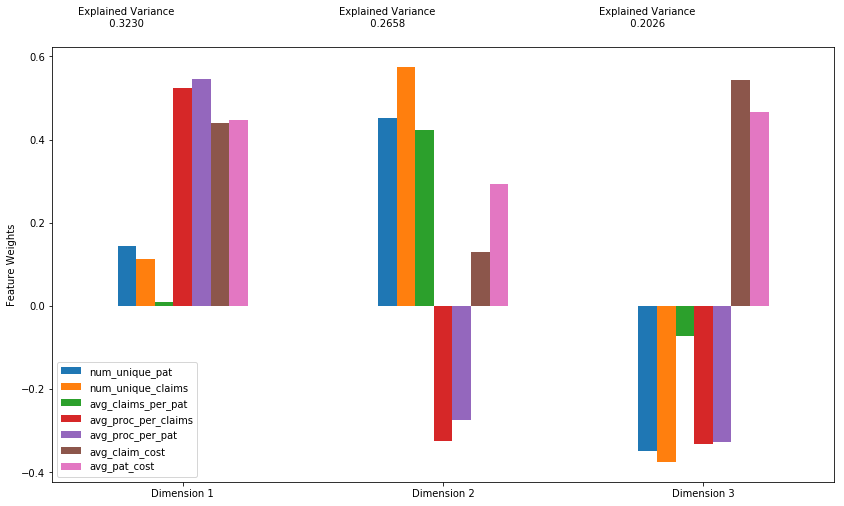

In [34]:
feature_lst = ['num_unique_pat', 'num_unique_claims', 'avg_claims_per_pat',
       'avg_proc_per_claims', 'avg_proc_per_pat', 'avg_claim_cost',
       'avg_pat_cost']
pca_results_vis = pca_results(feature_lst, pca)